In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import FastICA
from announce import *

In [2]:
early_warning_url = "data_exp_3.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,frame_time,total_pacotes,total_pacotes_icmp,total_pacotes_udp,total_pacotes_tcp,maior_pacote,menor_pacote,soma_pacotes,total_ips_origem,...,10_coefficient_variation_std_tcp_time_relative,10_lag-1AC_std_tcp_time_relative,10_lag-2AC_std_tcp_time_relative,10_lag-3AC_std_tcp_time_relative,10_skw_mean_tcp_time_relative,10_kurt_mean_tcp_time_relative,10_coefficient_variation_mean_tcp_time_relative,10_lag-1AC_mean_tcp_time_relative,10_lag-2AC_mean_tcp_time_relative,10_lag-3AC_mean_tcp_time_relative
0,0,"Nov 3, 2018 12:18:16.583626000 UTC",4,0,0,0,94,64,346,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Nov 3, 2018 12:18:18.506537000 UTC",31,0,0,18,342,60,2832,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Nov 3, 2018 12:18:19.155867000 UTC",6,4,0,0,130,60,456,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Nov 3, 2018 12:18:20.270477000 UTC",28,0,0,12,223,60,2938,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2019,"Nov 3, 2018 12:51:55.078214000 UTC",46,0,0,36,150,60,3732,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,2020,"Nov 3, 2018 12:51:56.092250000 UTC",69,4,0,54,100,60,5068,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,2021,"Nov 3, 2018 12:51:57.015140000 UTC",54,0,0,48,150,60,4032,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,2022,"Nov 3, 2018 12:51:58.192090000 UTC",56,0,0,50,112,60,3960,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
idioma = 'en'
labels_traducao = []
if idioma == 'en':
    labels_traducao = ['\n\nKurtosis of total \nsource IPs',
                      '\n\nCV of total packets',
                       '\n\nSkewness of total \ndestination IPs',
                       'Group 1',
                       'Group 2',
                       'Normal interval',
                       'Malicious interval',
                       '\n\nTotal source IPs',
                        '\n\nTotal packages',
                        '\n\nTotal destination IPs',
                      ]

# Avaliação 1

In [5]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 159
init = 101
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
#y_test = [0 if i == 1 else 1 for i in clustering.labels_]
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[33  7]
 [10  8]]
              precision    recall  f1-score   support

           0     0.7674    0.8250    0.7952        40
           1     0.5333    0.4444    0.4848        18

    accuracy                         0.7069        58
   macro avg     0.6504    0.6347    0.6400        58
weighted avg     0.6948    0.7069    0.6989        58



<Figure size 640x480 with 0 Axes>

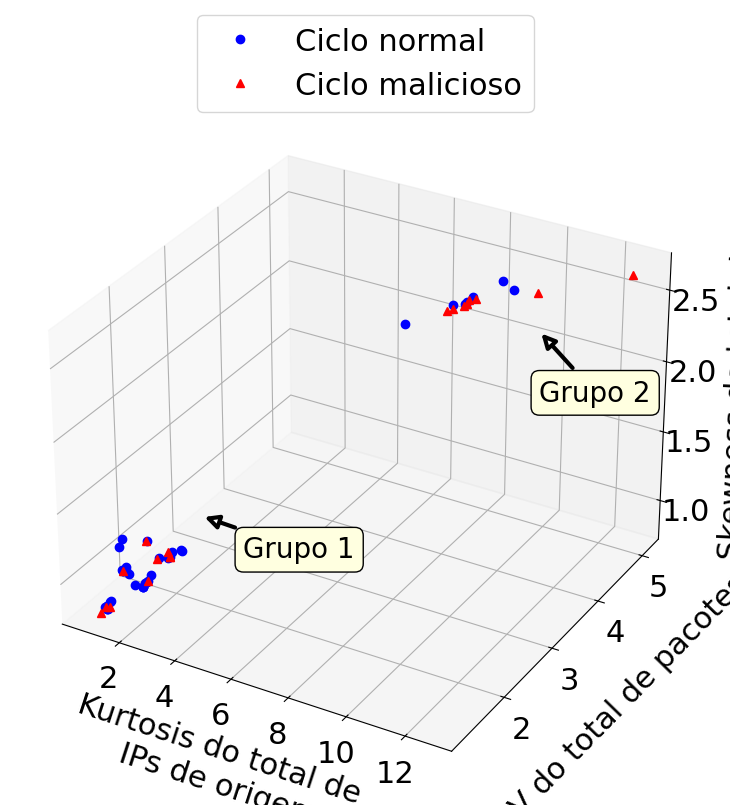

<Figure size 640x480 with 0 Axes>

In [6]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)

c = [ "blue" if i == 0 else "red" for i in y_test]

font_size_group = 20
ax2.annotate3D('Grupo 1', (6, 0.5, 2),
              xytext=(30, -30),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (5, 8, 1),
              xytext=(0, -50),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()

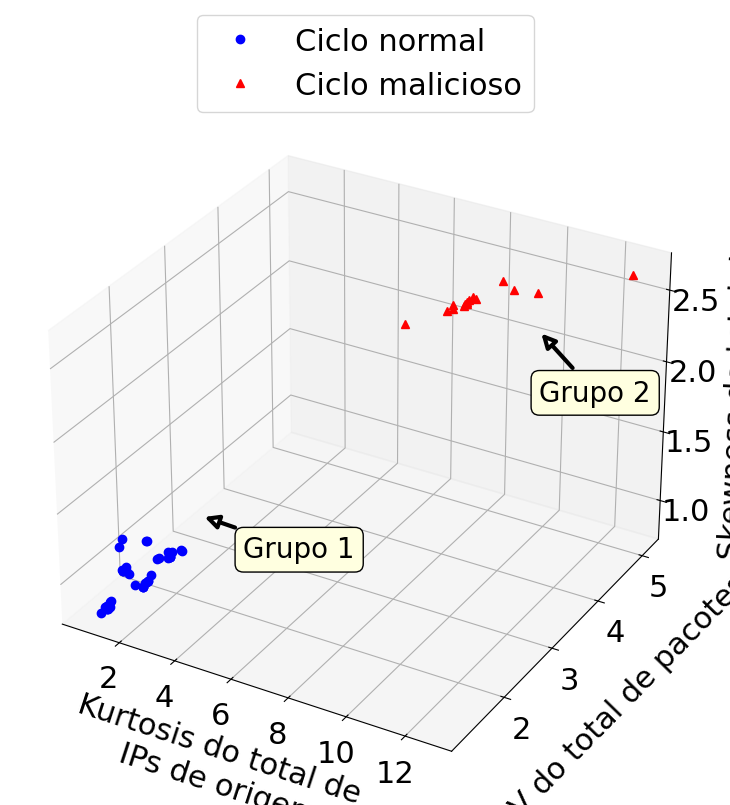

In [7]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20
ax2.annotate3D('Grupo 1', (6, 0.5, 2),
              xytext=(30, -30),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (5, 8, 1),
              xytext=(0, -50),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("cluster.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

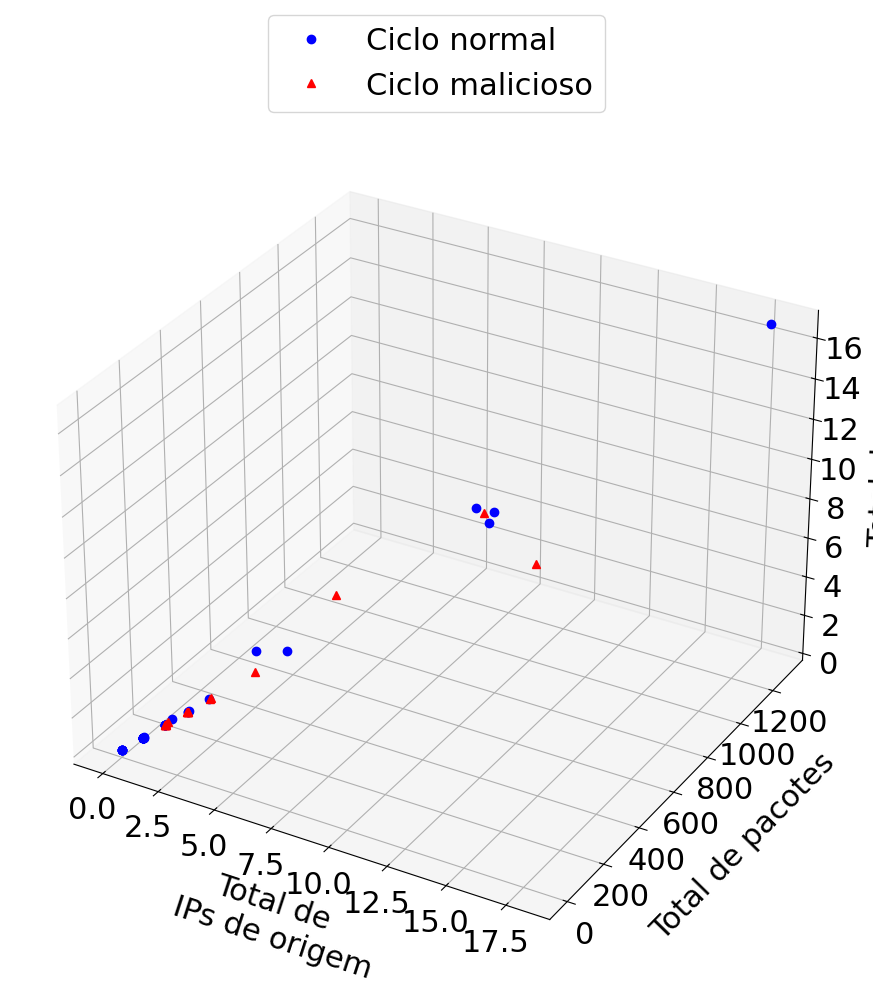

<Figure size 640x480 with 0 Axes>

In [8]:
colunas = ['total_ips_origem', 'total_ips_destino', 'total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (11, 11))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nTotal de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nTotal de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()

# Avaliação 2

In [9]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 159
init = 101
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
resultado2 = announce(x_train)
pd.set_option('display.max_rows', resultado2.shape[0]+1)
resultado2.to_csv('resultado_teste_padrao_exp_3.csv', sep=";")
resultado2

,Algorithm,mean,Calinski_harabasz_score_minmax,Silhouette_score_minmax,CDBW_minmax,Davies_bouldin_score_minmax_normalizado,SDBW_minmax_normalizado,Calinski_harabasz_score,Silhouette_score,Davies_bouldin_score,SDBW,CDBW,Davies_bouldin_score_minmax,SDBW_minmax
0,"KMeans(n_clusters=2, random_state=0, tol=1)",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
1,"KMeans(n_clusters=2, random_state=0, tol=0.1)",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
2,"KMeans(n_clusters=2, random_state=0, tol=0.01)",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
3,"KMeans(n_clusters=2, random_state=0, tol=0.001)",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
4,"KMeans(n_clusters=2, random_state=0)",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
5,"KMeans(algorithm='elkan', n_clusters=2, random...",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
6,"KMeans(algorithm='elkan', n_clusters=2, random...",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
7,"KMeans(algorithm='elkan', n_clusters=2, random...",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
8,"KMeans(algorithm='elkan', n_clusters=2, random...",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785
9,"KMeans(algorithm='elkan', n_clusters=2, random...",0.976843,1.000000,1.000000,1.000000,1.000000,0.884215,682.125356,0.866365,0.235777,0.368336,0.824598,0.000000,0.115785


In [10]:
algo = resultado2['Algorithm'][10]
print(algo)
clustering = eval(algo)
y_test = clustering.fit_predict(format_data(x_train))

print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

GaussianMixture(n_components=2, random_state=0)
[[33  7]
 [10  8]]
              precision    recall  f1-score   support

           0     0.7674    0.8250    0.7952        40
           1     0.5333    0.4444    0.4848        18

    accuracy                         0.7069        58
   macro avg     0.6504    0.6347    0.6400        58
weighted avg     0.6948    0.7069    0.6989        58



# Avaliação 3

In [11]:
limit = 1484
init = 101
count = 0
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
for i in range(init,limit - 58):
    novo_limit = i + 58  
    data = early_warning[colunas].copy()[init:novo_limit]
    y_real = early_warning['has_bot'][init:novo_limit]
    clustering = GaussianMixture(n_components=2, random_state=0)
    y_test = clustering.fit_predict(format_data(data))
    cdbw = compute_cdbw(data, y_test)

    if cdbw > 0.824597:
        print("Executando o intervalo: ", i, novo_limit)
        count+=1       
        acc = accuracy_score(y_real, y_test)
        if acc < 0.5:
            y_test = [0 if i == 1 else 1 for i in clustering.labels_]
            acc = accuracy_score(y_real, y_test)
        print(confusion_matrix(y_real, y_test)) 
        print(classification_report(y_real, y_test, digits=6))

print("o sistema gerou ", count, ' alertas')

Executando o intervalo:  101 159
[[33  7]
 [10  8]]
              precision    recall  f1-score   support

           0   0.767442  0.825000  0.795181        40
           1   0.533333  0.444444  0.484848        18

    accuracy                       0.706897        58
   macro avg   0.650388  0.634722  0.640015        58
weighted avg   0.694787  0.706897  0.698871        58

Executando o intervalo:  106 164
[[33 11]
 [10  9]]
              precision    recall  f1-score   support

           0   0.767442  0.750000  0.758621        44
           1   0.450000  0.473684  0.461538        19

    accuracy                       0.666667        63
   macro avg   0.608721  0.611842  0.610080        63
weighted avg   0.671705  0.666667  0.669024        63

Executando o intervalo:  107 165
[[33 12]
 [10  9]]
              precision    recall  f1-score   support

           0   0.767442  0.733333  0.750000        45
           1   0.428571  0.473684  0.450000        19

    accuracy              

# Avaliação 4

In [12]:
cols = early_warning.columns[55:361]
print(cols)
limit = 159
init = 101
x_train_novo = early_warning[cols].copy()[init:limit]
y_real_novo = early_warning['has_bot'][init:limit]
x_train_novo = x_train_novo.fillna(0)

Index(['5_skw_total_pacotes', '5_kurt_total_pacotes',
       '5_coefficient_variation_total_pacotes', '5_lag-1AC_total_pacotes',
       '5_lag-2AC_total_pacotes', '5_lag-3AC_total_pacotes',
       '5_skw_total_pacotes_icmp', '5_kurt_total_pacotes_icmp',
       '5_coefficient_variation_total_pacotes_icmp',
       '5_lag-1AC_total_pacotes_icmp',
       ...
       '5_coefficient_variation_std_tcp_time_relative',
       '5_lag-1AC_std_tcp_time_relative', '5_lag-2AC_std_tcp_time_relative',
       '5_lag-3AC_std_tcp_time_relative', '5_skw_mean_tcp_time_relative',
       '5_kurt_mean_tcp_time_relative',
       '5_coefficient_variation_mean_tcp_time_relative',
       '5_lag-1AC_mean_tcp_time_relative', '5_lag-2AC_mean_tcp_time_relative',
       '5_lag-3AC_mean_tcp_time_relative'],
      dtype='object', length=306)


In [13]:
pca = FastICA(n_components=5).fit(x_train_novo)
novo  = pca.transform(x_train_novo)

In [14]:
resultado3 = announce(pd.DataFrame(novo),number_clusters=2,cluster_validity_metric = 'cdbw')
resultado3.to_csv("resultado_fs_exp_3.csv", sep=";")
resultado3

,Algorithm,cdbw
0,"Birch(n_clusters=2, threshold=0.7)",0.399464
1,"Birch(n_clusters=2, threshold=0.6)",0.399464
2,"Birch(n_clusters=2, threshold=0.4)",0.399464
3,"Birch(n_clusters=2, threshold=0.3)",0.399464
4,Birch(n_clusters=2),0.399464
5,AgglomerativeClustering(linkage='single'),0.399464
6,AgglomerativeClustering(linkage='complete'),0.399464
7,"GaussianMixture(init_params='k-means++', n_com...",0.077923
8,"SOM(m=2, n=1, dim=5, random_state=0)",0.074897
9,"KMeans(n_clusters=2, random_state=0, tol=1)",0.053598


In [15]:
#print(resultado3['Algorithm'][0]) 
#clustering = eval(resultado3['Algorithm'][0]) 
clustering = Birch(n_clusters=2) 
y_test = clustering.fit_predict(novo)  
print(confusion_matrix(y_real_novo, y_test)) 
print(classification_report(y_real_novo, y_test, digits=6))

[[40  0]
 [16  2]]
              precision    recall  f1-score   support

           0   0.714286  1.000000  0.833333        40
           1   1.000000  0.111111  0.200000        18

    accuracy                       0.724138        58
   macro avg   0.857143  0.555556  0.516667        58
weighted avg   0.802956  0.724138  0.636782        58

